# 分裂聚类的实现和复杂度讨论

非常非常奇怪的是，无论是在网上还是在书上，都没有找到一个关于分裂聚类的实现的例子。不仅如此，就连分裂聚类的复杂度都没有找到一个比较清晰的讨论。

更让事情的是，网络上完全没有现成的代码可以参考。在所有资料中，对我帮助最大的是这篇文章，解释的通俗易懂：

https://chih-ling-hsu.github.io/2017/09/01/Divisive-Clustering

这里我就自己按照上文的逻辑写了一个特别简单的实现。

之所以特别简单，是因为中途分割那一步，我偷了懒，直接用了sklearn的kmeans做二分，没有手动计算距离矩阵。

但是它的效果还是不错的！

复杂度我没有能力去分析，但是我觉得应该是$O(n^2)$的。

In [3]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import copy


In [10]:
from sklearn.datasets import load_iris
import numpy as np
from scipy.spatial.distance import pdist, squareform

def divisive_clustering(X, num_clusters):
    clusters = np.zeros(X.shape[0], dtype=int)  # 用于存储每个样本的簇标签
    current_cluster_id = 0

    for _ in range(num_clusters - 1):
        # 找到最大的簇
        largest_cluster = np.argmax(np.bincount(clusters))
        indices = np.where(clusters == largest_cluster)[0]

        # 这里偷了个懒，直接用 Kmeans 二分， 这省了很多事！！！！！！！！
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=2, random_state=0).fit(X[indices])
        new_labels = kmeans.labels_

        # 更新簇
        new_cluster_id = current_cluster_id + 1
        for i, idx in enumerate(indices):
            clusters[idx] = new_cluster_id if new_labels[i] else current_cluster_id

        current_cluster_id += 1

    return clusters


Cluster assignments: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


c:\Users\Dustella\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Dustella\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


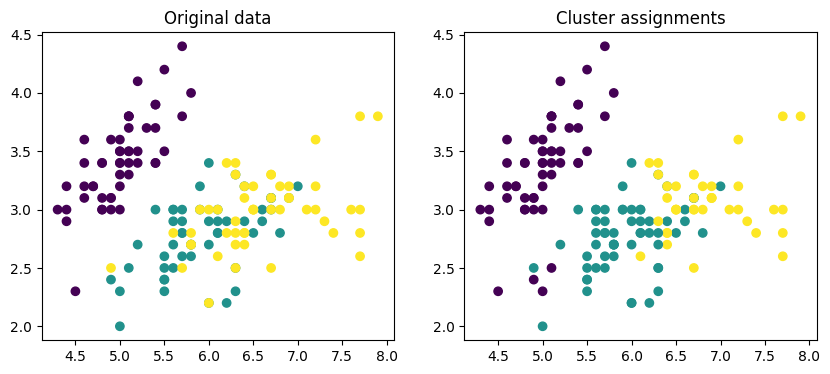

In [11]:

# Load data
iris = load_iris()
X = iris.data

# Apply divisive clustering
num_clusters = 3  # Example: we want 3 clusters
cluster_assignments = divisive_clustering(X, num_clusters)

# Output
print("Cluster assignments:", cluster_assignments)

# Plot results as colors
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Original data")
plt.scatter(X[:, 0], X[:, 1], c=iris.target)

plt.subplot(1, 2, 2)
plt.title("Cluster assignments")
plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments)

